# Урок 10. Дисперсионный анализ

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

***
## Однофакторный дисперсионный анализ (ANOVA - Analysis of variance)

Когда нам нужно понять, а влияет ли качественный показатель на количественный показатель, мы прибегаем к дисперсионному анализу. Т.е. зависимая переменная $y$ должна быть количественной случайной величиной, а $x$ (фактор) - качественной случайной величиной.

В однофакторном дисперсионном анализе на одну количественную переменную $y$ влияет один фактор (один качественный показатель), который наблюдается на $k$ уровнях или имеет $k$ выборок для переменной $y$.

Можем посчитаем средние по каждой выборке и сравним их средние между собой. И если мы обнаружим статистически значимые различия хотя бы между одной парой, то приходим к выводу, что есть статистически значимый эффект.

Появляется эффект **множественных сравнений** - с увеличением числа сравнений $m$ растет вероятность ошибки 1 рода, т.е. растет вероятность найти различия там, где их нет (растет вероятность принять гипотезу $H_1$, когда на самом деле верна гипотеза $H_0$). И вместо привычного, заранее выбранного уровня статистической значимости $\alpha$, появляется  $\bar{\alpha}$, которая является истинным уровнем значимости многократно примененного критерия: \
$\bar{\alpha} = 1 - (1 - \alpha)^m$, где $m = С_k^2$ - кол-во парных сравнений.

Чтобы этого избежать, лучше использовать **дисперсионный анализ**:
1. Формулируем нулевую и альтернативную гипотезы. \
Нулевая гипотеза будет предполагать, что на самом деле все группы принадлежат одной ГС и соотвественно имеют одно математическое ожидание. Альтернативная гипотеза говорит о том, что хотя бы две выборки статически значимо различаются, то есть хотя бы две средних отличаются друг от друга.
<br><br>

2. Устанавливаем уровень статистической значимости $\alpha$.
<br><br>

3. В дисперсионном анализе используется критерий Фишера. \
Табличное значение определяется на основе общего чила наблюдений в группах $n$, степеней свободы и заданного уровня значимости следующим образом: \
$F_к(\alpha,k_1,k_2)$, где \
$k_1 = k-1$ \
$k_2 = n-k$
<br><br>

    F-критерий Фишера рассчитывается по следующей формуле:\
$F = \cfrac{MS_B}{MS_W}$, где \
$MS_B = \cfrac{SS_{B}^2}{k-1}$ - межгрупповой средний квадрат / межгрупповая дисперсия / факторная дисперсия, \
$MS_W = \cfrac{SS_{W}^2}{n-k}$ - внутригрупповой средний квадрат / внутригрупповая дисперсия / остаточная дисперсия.
<br><br>

    $SS$ (sum of squares) - **сумма квадратов** (отклонения от какого-либо среднего значения):

    $\displaystyle SST = \sum_{i=1}^{k} \sum_{j=1}^{n_i} {(x_{ij} - \bar{X})^2}$ - общее число квадратов отклонений (Total Sum Of Squares)

    $\displaystyle SSB = \sum_{i=1}^{k}{(\bar{x_i} - \bar{X})^2 \cdot n_i}$ - факторная сумма квадратов отклонений средних групповых значений от общего среднего (Between Groups Sums of Squares)

    $\displaystyle SSW = \sum_{i=1}^{k} \sum_{j=1}^{n_i} {(x_{ij} - \bar{x_i})^2}$ - остаточная сумма квадратов отклонений значений от группового среднего (Within Groups Sums of Squares)

    $k$ - количество групп, $n_i$ - число наблюдений в $i$-ой группе.
    
    $SST = SSB + SSW$
<br><br>

4. Выводы: если $F_н < F_к$, то принимаем $H_0$.
<img src="./img/image1.png" alt="image1" width=""/>

In [2]:
df = pd.DataFrame({'y1': [70, 50, 65, 60, 75, 67, 74],
                   'y2': [80, 74, 90, 70, 75, 65, 85],
                   'y3': [148, 142, 140, 150, 160, 170, 155]})
df

,y1,y2,y3
0,70,80,148
1,50,74,142
2,65,90,140
3,60,70,150
4,75,75,160
5,67,65,170
6,74,85,155


In [3]:
k = df.shape[1]
n = df.shape[0]*k

m0 = df.values.mean()
colms = ['y1', 'y2', 'y3']

SSf = 0
for col in colms:
    m = df[col].mean()
    SSf += (m - m0)**2 * df[col].count()
SSf

30836.952380952374

In [4]:
SSo = 0
for col in colms:
    m = df[col].mean()
    SSo += sum((df[col] - m)**2)
SSo

1563.7142857142858

In [5]:
Df = SSf / (k-1)
Do = SSo / (n-k)
Df, Do

(15418.476190476187, 86.87301587301587)

In [6]:
Fn = Df / Do
Fn

177.48291613374744

In [7]:
alpha = 0.05
k1, k2 = k-1, n-k

# правосторонняя критическая область
Fk = stats.f.ppf(1-alpha, k1, k2)
Fk

3.554557145661787

In [8]:
stats.f_oneway(df['y1'], df['y2'], df['y3'])

F_onewayResult(statistic=177.48291613374704, pvalue=1.420466900107174e-12)

Расчетное значение 177,48 попадает в область принятия альтернативной гипотезы $H_1$. Т.е. мы делаем вывод, что профессия оказывает статистически значимый эффект на заработную плату.

***
### Post hoc test

Дисперсионный анализ не покажет,  между какими именно средними были найдены различия. Если по каким-то причинам нам нужно выяснить, а между какими именно группами найдены статистически значимые различия, то воспользуемся post hoc тестом.

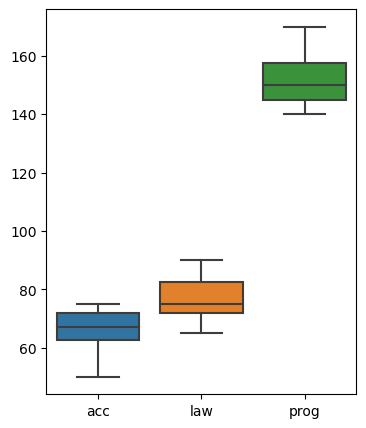

In [9]:
plt.figure(figsize=(4, 5))

sns.boxplot(data=[df['y1'], df['y2'], df['y3']]);

plt.xticks([0, 1, 2], ['acc', 'law', 'prog']);

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.DataFrame({'score': [70, 50, 65, 60, 75, 67, 74,
                             80, 74, 90, 70, 75, 65, 85,
                             148, 142, 140, 150, 160, 170, 155],
                   'group': np.repeat(['acc','law','prog'], repeats=7)})
df

,score,group
0,70,acc
1,50,acc
2,65,acc
3,60,acc
4,75,acc
5,67,acc
6,74,acc
7,80,law
8,74,law
9,90,law


In [11]:
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   acc    law  11.1429 0.0918 -1.5722 23.8579  False
   acc   prog  86.2857    0.0 73.5707 99.0007   True
   law   prog  75.1429    0.0 62.4278 87.8579   True
----------------------------------------------------


***
## Двухфакторный дисперсионный анализ

В двухфакторном дисперсионном анализе на одну количественную переменную $Y$ влияют два фактора (два качественных показателя), наблюдаемых соответственно на $k$ и $m$ уровнях.

Ообщая сумма квадратов отклонений $SS_T$ равна сумме квадратов отклонений фактора $A$ ($SS_A$), фактора $B$ ($SS_B$), взаимодействия факторов ($SS_{AB}$) и случайной ошибки ($SS_E$):
$$SS_T = SS_A + SS_B + SS_{AB} + SS_E$$

<img src="./img/image2.png" alt="image2" width=""/>

In [12]:
data = np.array([57,59,56,58,32,34,71,71]).reshape(2,2,2)
data

array([[[57, 59],
        [56, 58]],

       [[32, 34],
        [71, 71]]])

In [13]:
a, b, k = data.shape[0], data.shape[1], data.shape[2]

In [14]:
data2 = np.mean(data, axis=2)
data2

array([[58., 57.],
       [33., 71.]])

In [15]:
m = np.hstack((np.mean(data2, axis=(1)),
               np.mean(data2, axis=(0)))).mean()
m

54.75

In [16]:
SSt = np.sum(data**2) - a*b*k * m**2
SSt

1511.5

In [17]:
SSa = a*k * np.sum(np.mean(data2, axis=(1))**2) - a*b*k * m**2
SSa

60.5

In [18]:
SSb = b*k * np.sum(np.mean(data2, axis=(0))**2) - a*b*k * m**2
SSb

684.5

In [19]:
SSab = k * np.sum(data2**2) - a*b*k * m**2 - SSa - SSb
SSab

760.5

In [20]:
SSe = SSt - SSa - SSb - SSab
SSe

6.0

In [21]:
df_a = a - 1
df_b = b - 1
df_ab = (a-1)*(b-1)
df_e = a*b*(k-1)

In [22]:
MSa = SSa / df_a
MSb = SSb / df_b
MSab = SSab / df_ab
MSe = SSe / df_e

In [23]:
Fa = MSa / MSe
Fb = MSb / MSe
Fab = MSab / MSe
Fa, Fb, Fab

(40.333333333333336, 456.3333333333333, 507.0)

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

fA = np.array(['low','low','low','low','high','high','high','high'])
fB = np.array(['low','low','high','high','low','low','high','high'])
values = np.array([57,59,56,58,32,34,71,71])
df = pd.DataFrame({'fA': fA, 'fB': fB, 'values': values})
df

,fA,fB,values
0,low,low,57
1,low,low,59
2,low,high,56
3,low,high,58
4,high,low,32
5,high,low,34
6,high,high,71
7,high,high,71


In [25]:
model = ols('values ~ C(fA) * C(fB)', data = df).fit()

table = sm.stats.anova_lm(model, typ=2)
table

,sum_sq,df,F,PR(>F)
C(fA),60.5,1.0,40.333333,0.003150
C(fB),684.5,1.0,456.333333,0.000028
C(fA):C(fB),760.5,1.0,507.000000,0.000023
Residual,6.0,4.0,NaN,NaN


***
## Условия применимости дисперсионного анализа

1.	**Значения групп должны следовать нормальному распределению.** \
Проверить с помощью теста Шапиро-Уилка или с помощью QQ–графика.<br><br>

2.	**Однородность дисперсий** \
Однородность (равенство) дисперсий определяете с помощью Барлетт теста или с помощью теста Левене.<br><br>

3.	**Независимость измерений** \
Независимость измерений вы должны обеспечить во время планирования эксперимента, чтобы исключить влияния какие-то внешних факторов, избежать предвзятых оценок.